In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import util

In [3]:
ksi_df = pd.read_csv('Data/KSI.csv')
hazardous_df = pd.read_csv('Data/Hazardous_Driving_Areas_Toronto.csv')
ksi_collapse = pd.read_csv('Data/Created Datasets/KSI_Collapse_Count_truncate2.csv', index_col = 0)
ksi_collapse_3 = pd.read_csv('Data/Created Datasets/KSI_Collapse_Count_truncate3.csv', index_col = 0)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
ksi_df.head(1)

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.45249,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1


In [6]:
hazardous_df.head(1)

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version
0,dpz83ht,"POLYGON((-79.4023132324219 43.6624145507812, -...",43.662,-79.402,43.664,-79.401,POINT(-79.40205 43.66305),43.663,-79.402,Toronto,NaN,Ontario,Canada,CA-ON,0.08,11,2022-02-02,5.1


In [7]:
ksi_collapse['LATITUDE']

0      43.59
1      43.59
2      43.59
3      43.59
4      43.59
       ...  
683    43.84
684    43.85
685    43.85
686    43.85
687    43.85
Name: LATITUDE, Length: 688, dtype: float64

In [3]:
ksi_collapse_3

,LATITUDE,LONGITUDE,COUNT
0,43.590,-79.526,1
1,43.592,-79.542,1
2,43.592,-79.541,1
3,43.592,-79.534,1
4,43.593,-79.541,1
...,...,...,...
3968,43.853,-79.179,2
3969,43.854,-79.175,1
3970,43.854,-79.169,1
3971,43.855,-79.171,1


In [4]:
hazardous_df['Longitude'] = hazardous_df['Longitude'].apply(util.truncate, args = (3, ))
hazardous_df['Latitude'] = hazardous_df['Latitude'].apply(util.truncate, args = (3,))

In [7]:
hazardous_df_2 = hazardous_df.pivot_table(values = ['IncidentsTotal', 'SeverityScore'], index = ['Latitude', 'Longitude'], aggfunc = {'IncidentsTotal': sum, 'SeverityScore': np.mean}).reset_index()

In [8]:
hazardous_df_2

,Latitude,Longitude,IncidentsTotal,SeverityScore
0,40.474,-80.606,44,0.190
1,43.590,-79.545,3,0.012
2,43.591,-79.544,35,0.148
3,43.592,-79.543,6,0.026
4,43.593,-79.538,8,0.022
...,...,...,...,...
2809,43.833,-79.251,4,0.004
2810,43.834,-79.247,3,0.009
2811,43.835,-79.251,8,0.037
2812,43.836,-79.251,15,0.019


In [9]:
hazardous_df_2 = hazardous_df_2.merge(ksi_collapse_3, left_on = ['Latitude', 'Longitude'], right_on = ['LATITUDE', 'LONGITUDE'], how = 'inner')

In [10]:
hazardous_df_2

,Latitude,Longitude,IncidentsTotal,SeverityScore,LATITUDE,LONGITUDE,COUNT
0,43.593,-79.538,8,0.022,43.593,-79.538,3
1,43.610,-79.561,3,0.007,43.610,-79.561,2
2,43.612,-79.562,8,0.009,43.612,-79.562,1
3,43.613,-79.560,3,0.002,43.613,-79.560,1
4,43.614,-79.546,31,0.013,43.614,-79.546,1
...,...,...,...,...,...,...,...
573,43.824,-79.246,5,0.005,43.824,-79.246,1
574,43.825,-79.300,68,0.090,43.825,-79.300,3
575,43.831,-79.275,22,0.027,43.831,-79.275,3
576,43.833,-79.251,4,0.004,43.833,-79.251,1


In [12]:
hazardous_df_2.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)

In [13]:
hazardous_df_2.sort_values(by = 'COUNT', ascending = False)

,IncidentsTotal,SeverityScore,LATITUDE,LONGITUDE,COUNT
139,63,0.046,43.656,-79.452,10
577,15,0.019,43.836,-79.251,8
530,203,0.033,43.781,-79.494,8
508,59,0.047,43.769,-79.282,7
460,25,0.022,43.755,-79.245,7
...,...,...,...,...,...
71,12,0.041,43.644,-79.382,1
301,9,0.016,43.704,-79.550,1
300,13,0.020,43.703,-79.360,1
72,25,0.011,43.644,-79.378,1


In [16]:
hazardous_df_2[hazardous_df_2['LATITUDE'] == 43.676]

,IncidentsTotal,SeverityScore,LATITUDE,LONGITUDE,COUNT
222,3,0.008,43.676,-79.495,4
223,17,0.021,43.676,-79.361,1


In [15]:
# these two accidents occurred at the same intersection
# now with the proper procedure, collapse makes sense

ksi_collapse_3.loc[[1393,1394]]

,LATITUDE,LONGITUDE,COUNT
1393,43.676,-79.361,1
1394,43.676,-79.358,6


In [17]:
hazardous_df_2.to_csv('Hazardous_KSI_Merge_truncate3.csv')

<AxesSubplot:xlabel='COUNT', ylabel='IncidentsTotal'>

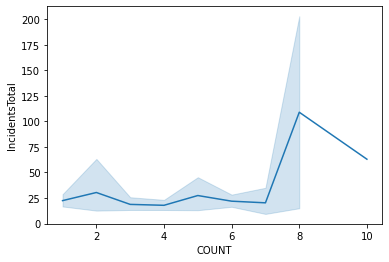

In [18]:
# std deviation for count of 10 not shown since only 1 record with that count

sns.lineplot(data = hazardous_df_2, y = 'IncidentsTotal', x = 'COUNT')

In [19]:
hazardous_df_2[hazardous_df_2['COUNT'] == 10]

,IncidentsTotal,SeverityScore,LATITUDE,LONGITUDE,COUNT
139,63,0.046,43.656,-79.452,10


In [20]:
# multiple incidents total for count of 2

hazardous_df_2[hazardous_df_2['COUNT'] == 2]

,IncidentsTotal,SeverityScore,LATITUDE,LONGITUDE,COUNT
1,3,0.007,43.610,-79.561,2
7,21,0.019,43.615,-79.524,2
15,29,0.020,43.623,-79.514,2
21,6,0.006,43.627,-79.562,2
24,3,0.005,43.630,-79.484,2
...,...,...,...,...,...
547,3,0.005,43.786,-79.311,2
550,16,0.014,43.787,-79.257,2
551,8,0.027,43.789,-79.373,2
555,3,0.003,43.794,-79.196,2
